#### student ID : 20141445

##### import librarys

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import random
import sys
import collections

##### define functions

##### energy : 
$$ \frac{1}{n} \sum_{x \in \Omega} \| f(x) - m_c \|^2 $$
where $\Omega$ denotes the image domain and the number of pixels $| \Omega |$ is $n$, and $m_c$ denotes the centroid for cluster $c$ that is the cluster label of $f(x)$.

In [2]:
def average(pixels):
    N = len(pixels)
    if N == 0: return np.empty([3])
    return np.divide(np.sum(pixels, 0),N)

def distance(one, other, norm_form):
    if norm_form == 1:
        return np.sum(np.absolute(one - other))
    else:
        return np.sqrt(np.mean((one-other)**2))

def energy(average, pixels, norm_form):
    return sum(distance(average, pixel, norm_form) for pixel in pixels)

##### random labeling

In [3]:
def randomLabeling(labels, K, rows, cols):
    for i in range(rows):
        for j in range(cols):
            labels[i][j] = random.choice(range(K))

##### make centroids

In [4]:
def makeCentroids(pixels_labeled, K, rows, cols):
    centroids = []
    for k in range(K):
        if(len(pixels_labeled[k]) == 0):
            random_init = np.empty((2))
            random_init[0] = np.random.randint(rows)
            random_init[1] = np.random.randint(cols)
            centroids.append(random_init)
        else:
            centroids.append(average(pixels_labeled[k]))
    return centroids

##### make pixels_labeled

In [5]:
def makePixeldsLabeled(pixels, labels, K):
    pixels_labeled = []
    for k in range(K):
        pixels_labeled.append(list())
    for i in range(len(pixels)):
        for j in range(len(pixels[i])):
            pixels_labeled[labels[i][j]].append(pixels[i][j])
    return pixels_labeled

##### labeling based centroid

In [6]:
def labelingBasedCentroid(pixels, labels, centroids, norm_form):
    for i in range(len(pixels)):
        for j in range(len(pixels[i])):
            min = (len(pixels) + len(pixels[i])) * 3
            for k in range(len(centroids)):
                dis = distance(pixels[i][j], centroids[k], norm_form)
                if min > dis:
                    min = dis
                    labels[i][j] = k

##### make output image

##### Output Image
$$ g(x) = m_c\space where\space label(x) = c $$
Each pixel of the output image $g(x)$ should be its centroid $m_c$ where $c$ is the cluster label of $g(x)$.

In [7]:
def getOutputImage(labels, centroids):
    output = []
    NUM_COLORS = len(centroids)
    color_map = plt.get_cmap('gist_rainbow', NUM_COLORS)
    for i in range(len(labels)):
        output.append(list())
        for j in range(len(labels[i])):
            output[i].append(color_map(labels[i][j]/NUM_COLORS))
    return np.array(output)

##### plot energy curve

In [8]:
def calculateEnergy(pixels_labeled, centroids, K, norm_form):
    result = 0
    for k in range(K):
        result += energy(centroids[k], pixels_labeled[k], norm_form)
    return result

##### make pixels array with own coordinate

In [9]:
def makePixels(rows, cols):
    pixels = np.empty([rows, cols, 2])
    for i in range(rows):
        for j in range(cols):
            pixels[i][j][0] = i
            pixels[i][j][1] = j
    return pixels

##### K-mean clustering

In [10]:
def k_mean_function(rows, cols, K, norm_form):
    height = rows
    width = cols
    print("K = " + str(K) + " culstering with L" + str(norm_form) + " norm.")
    labels = np.empty([height, width], dtype=int)
    before_labels = []
    energies = []
    randomLabeling(labels, K, rows, cols)
    pixels = makePixels(rows, cols)
    pixels_labeled = makePixeldsLabeled(pixels, labels, K)
    while not np.array_equal(before_labels, labels):
        before_labels = np.array(labels, copy=True)
        centroids = makeCentroids(pixels_labeled, K, rows, cols)
        labelingBasedCentroid(pixels, labels, centroids, norm_form)
        pixels_labeled = makePixeldsLabeled(pixels, labels, K)
        energies.append(calculateEnergy(pixels_labeled, centroids, K, norm_form))
    # plot energy curve
    plt.figure()
    plt.xlim(0,len(energies))
    plt.plot(energies,color='black',label='energy')
    plt.legend()
    plt.show()
    # plot output image
    img = getOutputImage(labels, centroids)
    imgplot = plt.imshow(img)
    plt.show()

##### execute function

K = 5 culstering with L1 norm.


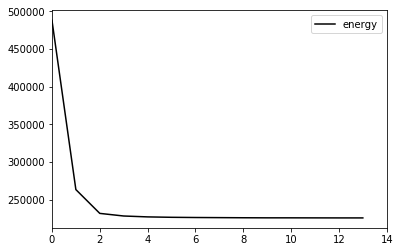

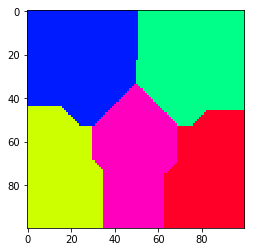

K = 8 culstering with L1 norm.


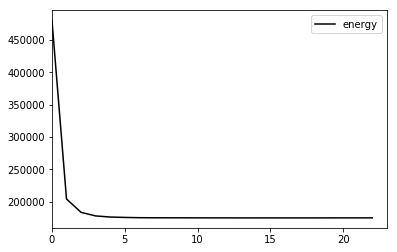

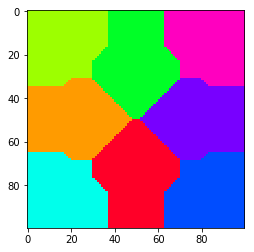

K = 16 culstering with L1 norm.


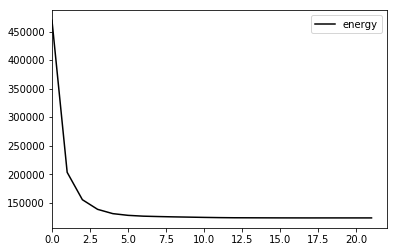

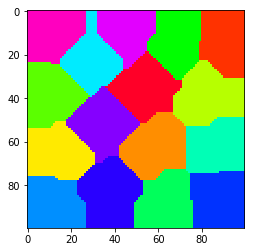

K = 5 culstering with L2 norm.


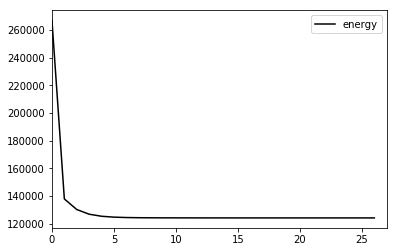

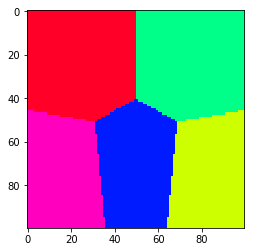

K = 8 culstering with L2 norm.


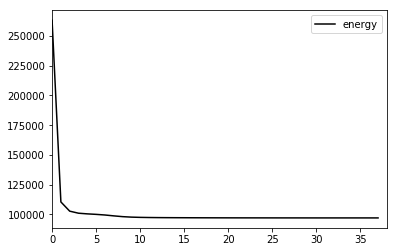

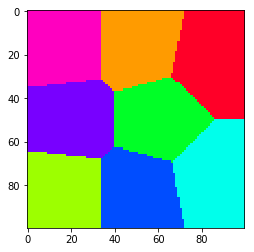

K = 16 culstering with L2 norm.


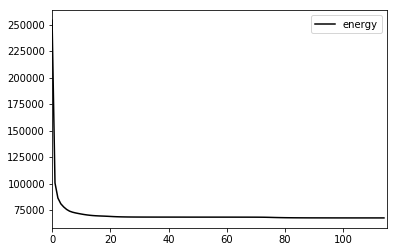

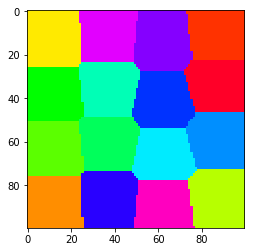

In [11]:
k_mean_function(100,100, 5, 1)
k_mean_function(100,100, 8, 1)
k_mean_function(100,100, 16, 1)
k_mean_function(100,100, 5, 2)
k_mean_function(100,100, 8, 2)
k_mean_function(100,100, 16, 2)